In [1]:
import pandas as pd
import cv2
import numpy as np
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
from math import sin, cos, tan, pi

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.columns = ["file_name", "center_x", "center_y", "alpha", "long_side", "short_side", "class"]

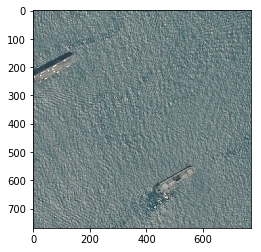

In [4]:
i = 160001
I = Image.open(df.file_name[i])
plt.imshow(I)
plt.show()

In [5]:
df.loc[i, :]

file_name     data\test\f67340666.jpg
center_x                          612
center_y                          625
alpha                         160.879
long_side                     26.4197
short_side                    1.04317
class                            ship
Name: 160001, dtype: object

In [6]:
def box2Polygon(center_x, center_y, alpha, long_side, short_side):
    alpha_r = alpha
    lty = center_y - (cos(alpha_r)*(long_side/2)) - (cos(pi/2-alpha_r)*(short_side/2))
    ltx = center_x + (sin(alpha_r)*(long_side/2)) - (sin(pi/2-alpha_r)*(short_side/2))
    rty = center_y - cos(alpha_r)*(long_side/2) + cos(pi/2-alpha_r)*(short_side/2)
    rtx = center_x + sin(alpha_r)*(long_side/2) + sin(pi/2-alpha_r)*(short_side/2)
    lby = center_y + cos(alpha_r)*(long_side/2) - cos(pi/2-alpha_r)*(short_side/2)
    lbx = center_x - sin(alpha_r)*(long_side/2) - sin(pi/2-alpha_r)*(short_side/2)
    rby = center_y + cos(alpha_r)*(long_side/2) + cos(pi/2-alpha_r)*(short_side/2)
    rbx = center_x - sin(alpha_r)*(long_side/2) + sin(pi/2-alpha_r)*(short_side/2)
    return (ltx, lty), (rtx, rty), (rbx, rby), (lbx, lby)

In [7]:
a = box2Polygon(df.center_x[i], df.center_y[i], df.alpha[i], df.long_side[i], df.short_side[i])

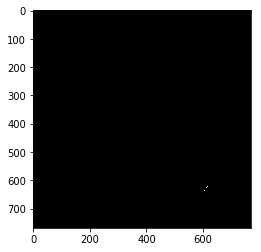

In [8]:
I = Image.fromarray(np.zeros((768, 768)))
ImageDraw.Draw(I).polygon(list(a), fill=255)
plt.imshow(I)
plt.show()
# ImageDraw.Draw(I).polygon(list(a), fill=(0, 0, 0))

In [9]:
I = Image.fromarray(np.zeros((100, 100)))
a = box2Polygon(50, 50, 45, 50, 50)
a

((58.13953839290967, 15.594362166203823),
 (84.40563783379623, 58.1395383929097),
 (41.86046160709032, 84.40563783379618),
 (15.59436216620376, 41.8604616070903))

In [10]:
from Utilities import mask2BoxParameters, annotation2Mask
from getABSDData import getABSDDataFrames

In [11]:
train, dev, test = getABSDDataFrames()

In [12]:
train = train.reindex()

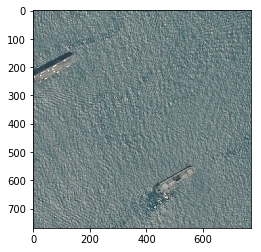

In [13]:
i = 160003
I = Image.open(train.iloc[i, 0])
plt.imshow(I)
plt.show()

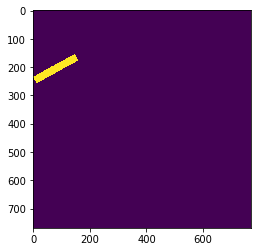

In [14]:
ann = train.iloc[i, 1]
mask = annotation2Mask(ann)
plt.imshow(mask)
plt.show()

In [15]:
(center_x, center_y, alpha, long_side, short_side) = mask2BoxParameters(mask)

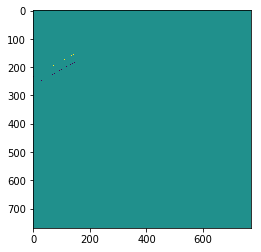

In [19]:
a = box2Polygon(center_x, center_y, alpha, long_side, short_side)
I = Image.fromarray(np.zeros((768, 768)))
ImageDraw.Draw(I).polygon(list(a), fill=1)
plt.imshow(I - mask)
plt.show()

In [17]:
center_x, center_y, alpha, long_side, short_side

(79.5, 206.0, 1.0695320619233142, 167.35889578985635, 25.553864678361276)